In [1]:
import sys
import pathlib

sys.path.append(str(pathlib.Path(sys.path[0]).parent / "libs"))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import qutip

In [3]:
%reload_ext autoreload
%autoreload 2

import bec
import entanglement_propagation
from tools.jupyter import print_model_info

In [4]:
n_bosons = 20
m_sites = 3

i_projection = n_bosons

tspan = np.linspace(0, 1.5, 301)

In [5]:
%%time

entropy_vn_spans = [
    (
        m_sites_,
        [
            entanglement_propagation.rho_b_ent(
                t,
                p=i_projection,
                k=(n_bosons,) * (m_sites_ // 2),
                m=m_sites_,
                n=n_bosons,
            )
            / np.log2(n_bosons + 1)
            for t in tqdm(tspan)
        ],
    )
    for m_sites_ in [3, 5]
]

100%|██████████| 301/301 [10:17<00:00,  2.05s/it]

CPU times: user 6min 26s, sys: 1min 45s, total: 8min 11s
Wall time: 10min 24s


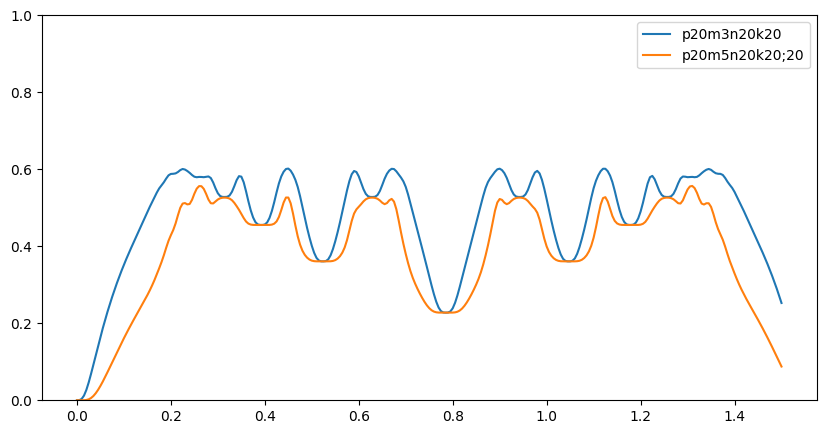

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

for m_sites_, entropy_vn_span in entropy_vn_spans:
    label = f"p{i_projection}m{m_sites_}n{n_bosons}k{';'.join(map(str, (n_bosons,) * (m_sites_ // 2)))}"
    ax.plot(tspan, entropy_vn_span, label=label)


ax.set_ylim(0, 1)
ax.legend()

# plt.savefig("../../assets/entropy_vn_span" + f"_p{i_projection}n{n_bosons}" + ".pdf")